In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [60]:
data = pd.read_csv("/content/Medicare dataset.csv")
data.head(5)

,provider_id,agency_name,street_address,city,state,zip_code,total_episodes_non_lupa,distinct_users_non_lupa,total_hha_charge_amount_non_lupa,total_hha_medicare_payment_amount_non_lupa,total_hha_medicare_standard_payment_amount_non_lupa,outlier_payments_as_a_percent_of_medicare_payment_amount_non_lupa,total_lupa_episodes,total_hha_medicare_payment_amount_for_lupas
0,108302,VIRGIN HEALTH CORPORATION INC,7235 CORPORATE CENTER DR BAY H,MIAMI,FL,33126,568,202,3925897,1748362,1613563,10,16.0,5033.0
1,108379,PATIENT'S CHOICE HOME HEALTH CARE INC,10300 SUNSET DRIVE SUITE 310,MIAMI,FL,33184,96,38,488807,282100,255475,10,27.0,10878.0
2,337290,"AMERICARE CERTIFIED SPECIAL SERVICES, INC CHHA",5923 STRICKLAND AVENUE,BROOKLYN,NY,11234,3148,2310,14112445,12667998,9482140,10,259.0,108050.0
3,747394,GRANDCARE HOME HEALTH LLC,4701 ARDENWOOD DRIVE,FORT WORTH,TX,76123,773,220,2175373,2016621,1971446,10,30.0,10111.0
4,27001,PROVIDENCE IN HOME SERVICES,"4001 DALE STREET, SUITE 101",ANCHORAGE,AK,99508,688,604,2598179,2387679,2090178,0,121.0,57716.0


In [63]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11062 entries, 0 to 11061
Data columns (total 14 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   provider_id                                                        11062 non-null  int64  
 1   agency_name                                                        11062 non-null  object 
 2   street_address                                                     11062 non-null  object 
 3   city                                                               11062 non-null  object 
 4   state                                                              11062 non-null  object 
 5   zip_code                                                           11062 non-null  int64  
 6   total_episodes_non_lupa                                            11062 non-null  int64  
 7   distinct_users_non_lup

In [64]:
# Replacing missing values in 'total_lupa_episodes' column with its mean
mean_total_lupa_episodes = data['total_lupa_episodes'].mean()
data['total_lupa_episodes'].fillna(mean_total_lupa_episodes, inplace=True)

# Replacing missing values in 'total_hha_medicare_payment_amount_for_lupas' column with its mean
mean_total_hha_payment_lupas = data['total_hha_medicare_payment_amount_for_lupas'].mean()
data['total_hha_medicare_payment_amount_for_lupas'].fillna(mean_total_hha_payment_lupas, inplace=True)


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11062 entries, 0 to 11061
Data columns (total 14 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   provider_id                                                        11062 non-null  int64  
 1   agency_name                                                        11062 non-null  object 
 2   street_address                                                     11062 non-null  object 
 3   city                                                               11062 non-null  object 
 4   state                                                              11062 non-null  object 
 5   zip_code                                                           11062 non-null  int64  
 6   total_episodes_non_lupa                                            11062 non-null  int64  
 7   distinct_users_non_lup

In [66]:
columns_to_drop = ['provider_id','street_address','zip_code']
data = data.drop(columns=columns_to_drop)

In [67]:
# Filter for Michigan state rows
data = data[data['state'] == 'MI']  # Assuming the state column is named 'state'

# Optional: Reset the index to maintain a continuous row numbering
data = data.reset_index(drop=True)


In [68]:
data.describe()

,total_episodes_non_lupa,distinct_users_non_lupa,total_hha_charge_amount_non_lupa,total_hha_medicare_payment_amount_non_lupa,total_hha_medicare_standard_payment_amount_non_lupa,outlier_payments_as_a_percent_of_medicare_payment_amount_non_lupa,total_lupa_episodes,total_hha_medicare_payment_amount_for_lupas
count,629.000000,629.000000,6.290000e+02,6.290000e+02,6.290000e+02,629.000000,629.000000,629.000000
mean,378.104928,251.755167,1.132745e+06,1.108152e+06,1.178024e+06,0.116057,74.903989,25619.350843
std,804.324933,539.115946,2.743337e+06,2.427526e+06,2.580731e+06,0.452396,101.962007,35281.930552
min,12.000000,11.000000,1.901400e+04,2.873900e+04,3.185800e+04,0.000000,0.000000,0.000000
25%,88.000000,58.000000,2.313850e+05,2.712660e+05,2.946020e+05,0.000000,24.000000,8046.000000
50%,178.000000,107.000000,5.090460e+05,5.514150e+05,5.964060e+05,0.000000,77.518578,26871.387928
75%,381.000000,227.000000,1.098763e+06,1.108642e+06,1.181673e+06,0.000000,77.518578,26871.387928
max,11241.000000,6914.000000,4.383052e+07,3.725864e+07,3.938902e+07,5.000000,1176.000000,393106.000000


In [69]:
column_name = 'total_episodes_non_lupa'

percentile_99 = data[column_name].quantile(0.99)

data.loc[data[column_name] > percentile_99, column_name] = percentile_99

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   agency_name                                                        629 non-null    object 
 1   city                                                               629 non-null    object 
 2   state                                                              629 non-null    object 
 3   total_episodes_non_lupa                                            629 non-null    float64
 4   distinct_users_non_lupa                                            629 non-null    int64  
 5   total_hha_charge_amount_non_lupa                                   629 non-null    int64  
 6   total_hha_medicare_payment_amount_non_lupa                         629 non-null    int64  
 7   total_hha_medicare_standar

In [71]:
duplicates = data[data.duplicated()]

data.drop_duplicates(inplace=True)

**EXPLORATORY** **DATA** **ANALYSIS**

In [72]:
#
non_lupa_state = data.groupby('state')["total_episodes_non_lupa"].sum().reset_index(name='non_lupa')
non_lupa_state = non_lupa_state.sort_values(by='non_lupa', ascending=False)


In [73]:
non_lupa_state.head()

,state,non_lupa
0,MI,214697.68


<Axes: title={'center': 'MI state with the most non-LUPA episodes'}, ylabel='state'>

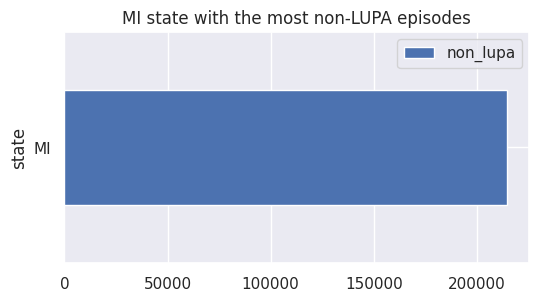

In [74]:
nonlupa_15 = non_lupa_state.head(15)
nonlupa_15.set_index('state', inplace = True)
nonlupa_15.plot(kind = 'barh', figsize = (6,3), title = 'MI state with the most non-LUPA episodes')

In [75]:
# Filter by state
data_filtered = data[data['state'] == "MI"]

# Group and aggregate
non_lupa_MI = data_filtered.groupby('city')['total_episodes_non_lupa'].sum().reset_index(name='non_lupa')

# Sort and display
non_lupa_MI = non_lupa_MI.sort_values(by='non_lupa', ascending=True)
print(non_lupa_MI.head(30))


                 city  non_lupa
90         MARYSVILLE      13.0
7             AUGUSTA      22.0
40       EAST LANSING      23.0
132           TRENTON      35.0
42             EDMORE      48.0
24          CASS CITY      81.0
78       LAMBERTVILLE      83.0
41         EASTPOINTE      85.0
58          HAMTRAMCK      87.0
51           FLUSHING      99.0
136         WATERFORD     102.0
39           DOWAGIAC     110.0
97   MUSKEGON HEIGHTS     114.0
30            CLAWSON     128.0
134      W BLOOMFIELD     140.0
98          NEW HAVEN     151.0
26          CHARLOTTE     162.0
69         IMLAY CITY     174.0
43        EDWARDSBURG     180.0
49          FLAT ROCK     182.0
56         GRANDVILLE     190.0
118      SAINT JOSEPH     197.0
75            JENISON     199.0
142         WOODHAVEN     204.0
125        ST HEIGHTS     210.0
77             L ANSE     222.0
61       HARPER WOODS     248.0
87        MARINE CITY     254.0
15           BRIDGMAN     255.0
143         WYANDOTTE     261.0


<Axes: title={'center': '20 cities in Michigan with most non-LUPA episodes'}, ylabel='city'>

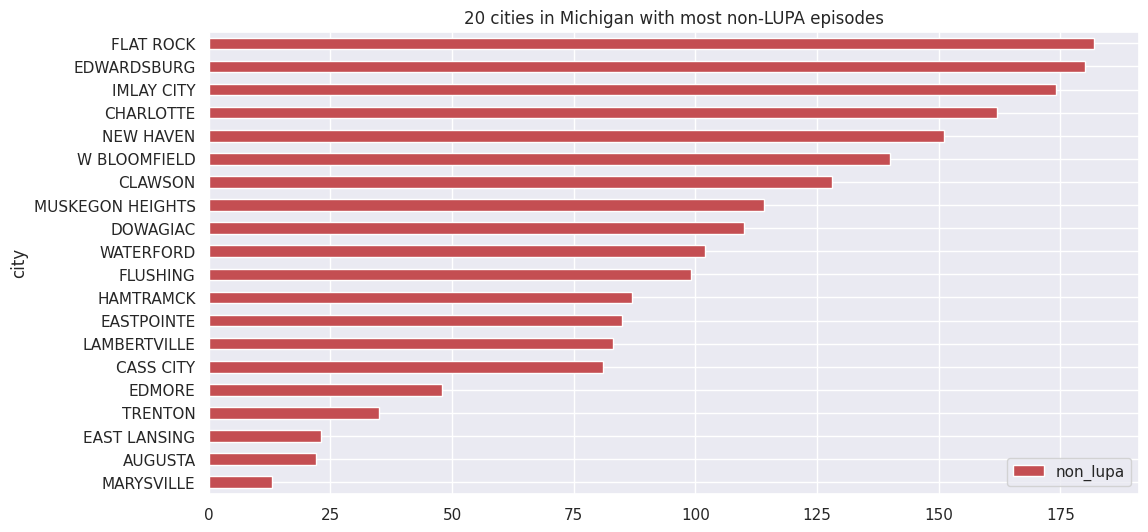

In [76]:
michigan_20 = non_lupa_MI.head(20)
michigan_20.set_index('city', inplace = True)
michigan_20.plot(kind = 'barh',
              figsize = (12,6),
              color = 'r',
              title = '20 cities in Michigan with most non-LUPA episodes')

In [77]:
#
lupa_state = data.groupby('state')["total_lupa_episodes"].sum().reset_index(name='lupa')
lupa_state = lupa_state.sort_values(by='lupa', ascending=False)


lupa_state.head(15)

,state,lupa
0,MI,47114.608987


<Axes: title={'center': 'MI state with most LUPA episodes'}, ylabel='state'>

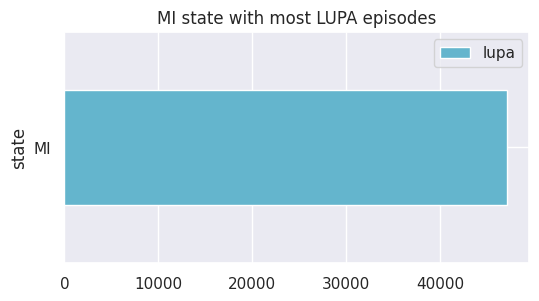

In [78]:
#
lupa_15 = lupa_state.head(15)
lupa_15.set_index('state',inplace = True)
lupa_15.plot(kind = 'barh',
             color = 'c',
             figsize = (6,3),
             title = 'MI state with most LUPA episodes')

In [79]:
# Filter by state
data_filtered = data[data['state'] == "MI"]

# Group and aggregate
lupa_MI = data_filtered.groupby('city')['total_lupa_episodes'].sum().reset_index(name='lupa')

# Sort and display
lupa_MI = lupa_MI.sort_values(by='lupa', ascending=False)
print(lupa_MI.head(20))


                 city         lupa
122        SOUTHFIELD  5439.966063
85    MADISON HEIGHTS  2906.185781
38            DETROIT  1780.630047
55       GRAND RAPIDS  1649.111469
133              TROY  1631.667203
47   FARMINGTON HILLS  1626.334406
74            JACKSON  1553.037156
83            LIVONIA  1552.815828
36           DEARBORN  1206.222938
31   CLINTON TOWNSHIP  1175.037156
21             CANTON  1108.222938
129            TAYLOR  1010.222938
13      BINGHAM FARMS   927.000000
135            WARREN   920.148625
4           ANN ARBOR   809.518578
116           SAGINAW   745.555734
110           REDFORD   720.667203
126  STERLING HEIGHTS   717.555734
2          ALLEN PARK   699.037156
79            LANSING   690.037156


<Axes: title={'center': '20 cities in Michigan with most LUPA episodes'}>

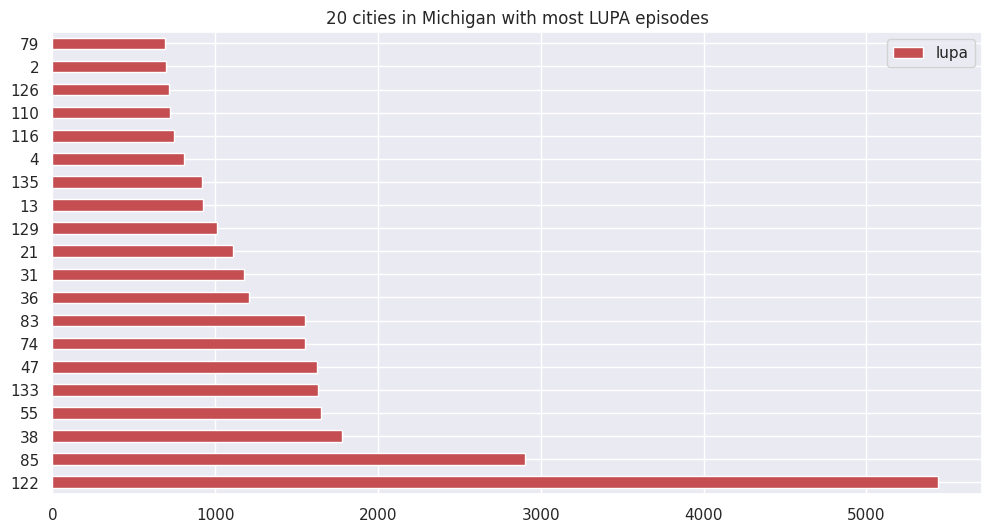

In [80]:
michigan_20 = lupa_MI.head(20)
michigan_20.set_index('city', inplace = False)
michigan_20.plot(kind = 'barh',
              figsize = (12,6),
              color = 'r',
              title = '20 cities in Michigan with most LUPA episodes')

In [81]:

non_lupa_charges = data.groupby('state')[
    ["total_hha_charge_amount_non_lupa", "total_hha_medicare_standard_payment_amount_non_lupa"]
].sum().reset_index()

# Sorting the result by 'total_hha_medicare_standard_payment_amount_non_lupa' in descending order
non_lupa_charges = non_lupa_charges.sort_values(by='total_hha_medicare_standard_payment_amount_non_lupa', ascending=False)

# Displaying the top 15 rows
non_lupa_charges.head(15)


,state,total_hha_charge_amount_non_lupa,total_hha_medicare_standard_payment_amount_non_lupa
0,MI,712496555,740976965


Total non-LUPA charges in Michigan: $712,496,555.00
Total Medicare standard payments in Michigan: $740,976,965.00


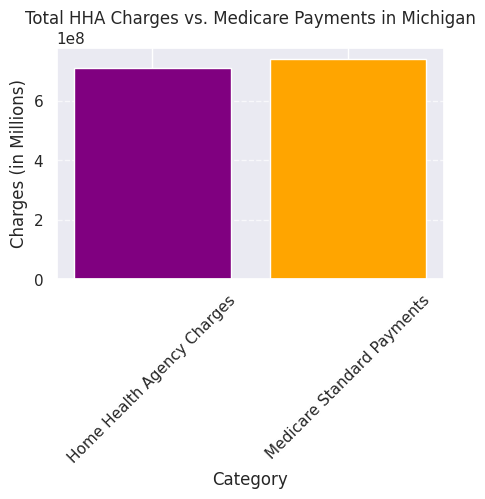

In [82]:
# Group and sum data
non_lupa_charges = data.groupby('state')[
    ["total_hha_charge_amount_non_lupa", "total_hha_medicare_standard_payment_amount_non_lupa"]
].sum().reset_index()

# Filter for Michigan data
michigan_data = non_lupa_charges[non_lupa_charges['state'] == 'MI']

# Extract values
non_lupa_amount = michigan_data['total_hha_charge_amount_non_lupa'].iloc[0]
medicare_payment = michigan_data['total_hha_medicare_standard_payment_amount_non_lupa'].iloc[0]

# Print total charges
print(f"Total non-LUPA charges in Michigan: ${non_lupa_amount:,.2f}")
print(f"Total Medicare standard payments in Michigan: ${medicare_payment:,.2f}")

# Create bar graph
labels = ['Home Health Agency Charges', 'Medicare Standard Payments']
values = [non_lupa_amount, medicare_payment]

plt.figure(figsize=(5, 3))
plt.bar(labels, values, color=['purple', 'orange'])
plt.title('Total HHA Charges vs. Medicare Payments in Michigan')
plt.xlabel('Category')
plt.ylabel('Charges (in Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


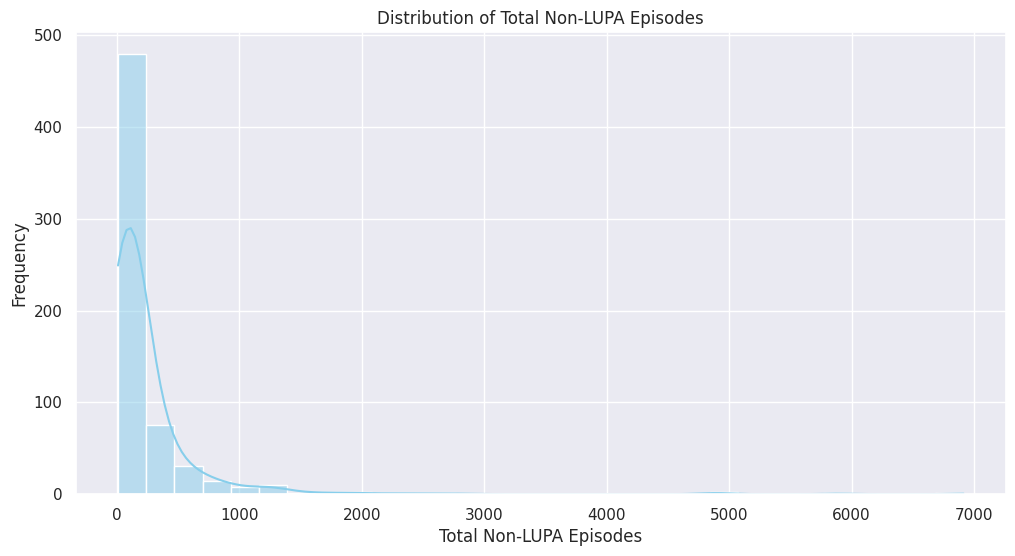

In [83]:
# Data Distribution Plots
plt.figure(figsize=(12, 6))
sns.histplot(data['distinct_users_non_lupa'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Non-LUPA Episodes')
plt.xlabel('Total Non-LUPA Episodes')
plt.ylabel('Frequency')
plt.show()

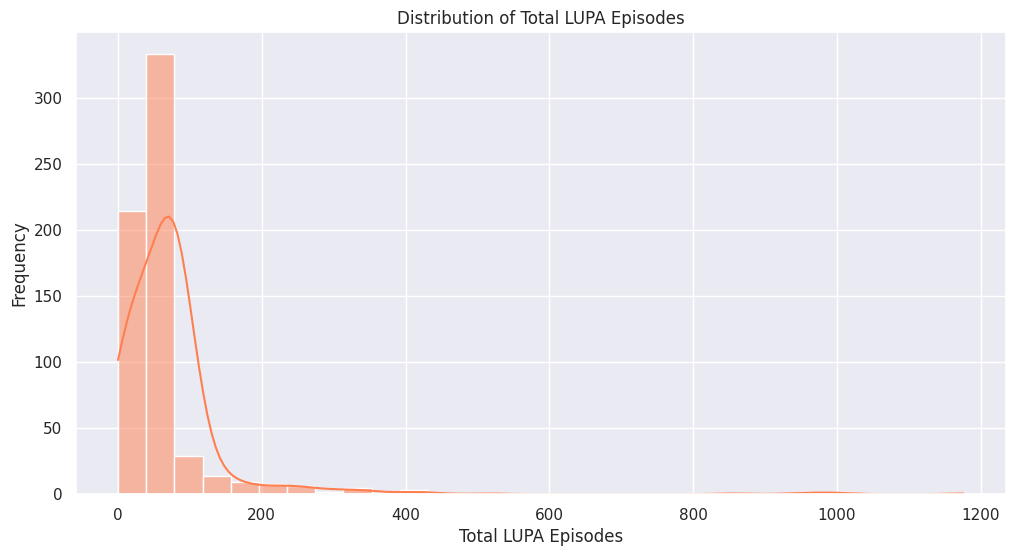

In [113]:
# Data Distribution Plots
plt.figure(figsize=(12, 6))
sns.histplot(data['total_lupa_episodes'], bins=30, kde=True, color='coral')
plt.title('Distribution of Total LUPA Episodes')
plt.xlabel('Total LUPA Episodes')
plt.ylabel('Frequency')
plt.show()